In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

np.random.seed(42)

In [8]:

# Create arrays with filenames and lables
inFile = open("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/train.txt", "r")

all_images = []
all_labels = []
for i, v in enumerate(inFile):
    all_images.append(str(i)+".jpg")
    all_labels.append(float(v))

all_images.shape, all_labels.shape

((20400,), (20400,))

In [10]:
import random

c = list(zip(all_images, all_labels))

random.shuffle(c)

all_images, all_labels = zip(*c)

In [11]:
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [13]:
train_images, val_images, test_images = all_images[: 14280], all_images[14280 : 18360], all_images[18360 :]
train_labels, val_labels, test_labels = all_labels[: 14280], all_labels[14280 : 18360], all_labels[18360 :]

In [14]:
IMG_DIM = (150, 150)

train_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/"+img, target_size=IMG_DIM)) for img in train_images]
train_images_array = np.array(train_images_array)

val_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/"+img, target_size=IMG_DIM)) for img in val_images]
val_images_array = np.array(val_images_array)

test_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/"+img, target_size=IMG_DIM)) for img in test_images]
test_images_array = np.array(val_images_array)

print('Train dataset shape:', train_images_array.shape, '\tValidation dataset shape:', val_images_array.shape, '\tTest dataset shape:', test_images_array.shape)


Train dataset shape: (14280, 150, 150, 3) 	Validation dataset shape: (4080, 150, 150, 3) 	Test dataset shape: (4080, 150, 150, 3)


(150, 150, 3)


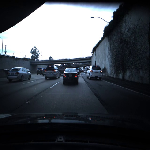

In [15]:
train_imgs_scaled = train_images_array.astype('float32')
val_imgs_scaled  = val_images_array.astype('float32')
test_imgs_scaled  = test_images_array.astype('float32')
train_imgs_scaled /= 255
val_imgs_scaled /= 255
test_imgs_scaled /= 255

print(train_images_array[0].shape)
array_to_img(train_images_array[0])

In [16]:
from keras.applications import vgg16
from keras.models import Model
import keras
import pandas as pd

In [17]:
#24 devides all datasets
batch_size = 24
epochs = 20
input_shape = (150, 150, 3)

In [18]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

In [19]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)


In [20]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [21]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000015010C7CFA0>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001506A2267F0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001506A2269A0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001506A226C70>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001506A2804F0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001506A28B910>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001506A28B940>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000015062328BB0>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001506A297820>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001506A29C580>,block3_conv3,False


(1, 4, 4, 512)


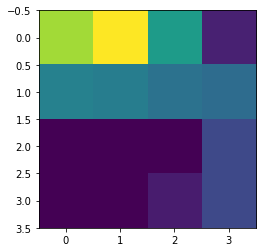

In [22]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [23]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=1)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
val_features_vgg = get_bottleneck_features(vgg_model, val_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', val_features_vgg.shape)

128/128 [==============================] - 469s 4s/step
Train Bottleneck Features: (14280, 8192) 	Validation Bottleneck Features: (4080, 8192)


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

In [25]:
input_shape = vgg_model.output_shape[1]
input_shape

8192

In [26]:
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))


In [27]:
model.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mean_squared_error', metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x=train_features_vgg, y=train_labels,
                    validation_data=(val_features_vgg, val_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/20
595/595 [==============================] - 19s 30ms/step - loss: 35.8567 - val_loss: 5.6715
Epoch 2/20
595/595 [==============================] - 18s 31ms/step - loss: 4.4637 - val_loss: 2.1053
Epoch 3/20
595/595 [==============================] - 19s 31ms/step - loss: 2.7769 - val_loss: 2.0863
Epoch 4/20
595/595 [==============================] - 19s 31ms/step - loss: 2.4032 - val_loss: 1.0340
Epoch 5/20
595/595 [==============================] - 19s 32ms/step - loss: 2.1403 - val_loss: 1.0190
Epoch 6/20
595/595 [==============================] - 19s 32ms/step - loss: 1.9128 - val_loss: 0.9543
Epoch 7/20
595/595 [==============================] - 19s 32ms/step - loss: 1.8934 - val_loss: 0.7164
Epoch 8/20
595/595 [==============================] - 19s 32ms/step - loss: 1.6553 - val_loss: 0.8127
Epoch 9/20
595/595 [==============================] - 19s 32ms/step - loss: 1.6242 - val_loss: 0.5898
Epoch 10/20
595/595 [==============================] - 19s 32ms/step - loss: 1.61

In [30]:
model.save('model_regression_frames.h5')

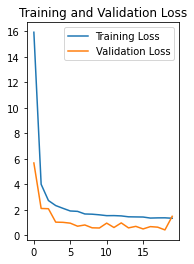

In [32]:
#plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)


 30/128 [======>.......................] - ETA: 6:34

In [ ]:
results = model.evaluate(test_bottleneck_features, test_labels, batch_size=batch_size)


In [ ]:
Credit to this tutorial: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a